We performed 6 different kinds of ML mtthods, and ablation study was performed on each ML method.

Here, we took task4 as an example.

# NR-Aromatase

Energy，homo，lumo，HLgap，The mean and variance of the charges，dipole，mass，volume，density are extracted from wavefuntions

In [3]:
from rdkit import Chem
from rdkit.Chem import PandasTools

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
norm_datasets = pd.read_csv("NR-Aromatase_209_with_activity.csv")
columns = norm_datasets.columns

norm_datasets

,ID,smiles,activity,energy,homo,lumo,HLgap,charge_ave,charge_var,dipole,mass,vol,dens
0,47,CCOP(=S)(CC)Sc1ccccc1,1,0.948334,0.404414,0.313344,0.297571,0.333333,0.057229,0.037083,0.272867,0.286945,0.130293
1,131,CCCC1COC(Cn2cncn2)(c2ccc(Cl)cc2Cl)O1,1,0.940981,0.295934,0.286802,0.393640,0.333333,0.025744,0.051104,0.392918,0.393488,0.150602
2,139,Clc1ccc(C(Cn2ccnc2)OCc2c(Cl)cccc2Cl)c(Cl)c1,1,0.909633,0.325660,0.286535,0.357900,0.333333,0.019792,0.078314,0.485023,0.455846,0.176554
3,159,COc1ccc2sc(C(=O)Nc3nnn[n-]3)c(OC(C)C)c2c1,1,0.954123,0.491903,0.352646,0.242437,0.315315,0.047080,0.387991,0.381564,0.380805,0.151562
4,172,CN(C)C(=O)Nc1ccc(Oc2ccc(Cl)cc2)cc1,1,0.958889,0.349433,0.314728,0.364787,0.333333,0.037426,0.076846,0.328512,0.349253,0.128243
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,4740,O=C1[N-]C(=O)c2ccccc21,0,0.986185,0.545493,0.421624,0.264733,0.288889,0.065508,0.123642,0.146544,0.141481,0.148136
205,4741,C=C[Si](OCCOC)(OCCOC)OCCOC,0,0.963295,0.288209,0.360604,0.494991,0.333333,0.109483,0.026316,0.315946,0.373088,0.094179
206,4742,CCCCCCCCCCCl,0,0.974303,0.249853,0.403670,0.594448,0.333333,0.012680,0.039779,0.184576,0.251970,0.052788
207,4743,CC(C)[N+](C)(CCOC(=O)C1c2ccccc2Oc2ccccc21)C(C)C,0,0.963337,0.293399,0.261044,0.364498,0.345029,0.024064,0.307492,0.427216,0.503678,0.095571


In [5]:
PandasTools.AddMoleculeColumnToFrame(frame=norm_datasets, smilesCol = 'smiles')

,ID,smiles,activity,energy,homo,lumo,HLgap,charge_ave,charge_var,dipole,mass,vol,dens,ROMol
0,47,CCOP(=S)(CC)Sc1ccccc1,1,0.948334,0.404414,0.313344,0.297571,0.333333,0.057229,0.037083,0.272867,0.286945,0.130293,
1,131,CCCC1COC(Cn2cncn2)(c2ccc(Cl)cc2Cl)O1,1,0.940981,0.295934,0.286802,0.393640,0.333333,0.025744,0.051104,0.392918,0.393488,0.150602,
2,139,Clc1ccc(C(Cn2ccnc2)OCc2c(Cl)cccc2Cl)c(Cl)c1,1,0.909633,0.325660,0.286535,0.357900,0.333333,0.019792,0.078314,0.485023,0.455846,0.176554,
3,159,COc1ccc2sc(C(=O)Nc3nnn[n-]3)c(OC(C)C)c2c1,1,0.954123,0.491903,0.352646,0.242437,0.315315,0.047080,0.387991,0.381564,0.380805,0.151562,
4,172,CN(C)C(=O)Nc1ccc(Oc2ccc(Cl)cc2)cc1,1,0.958889,0.349433,0.314728,0.364787,0.333333,0.037426,0.076846,0.328512,0.349253,0.128243,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,4740,O=C1[N-]C(=O)c2ccccc21,0,0.986185,0.545493,0.421624,0.264733,0.288889,0.065508,0.123642,0.146544,0.141481,0.148136,
205,4741,C=C[Si](OCCOC)(OCCOC)OCCOC,0,0.963295,0.288209,0.360604,0.494991,0.333333,0.109483,0.026316,0.315946,0.373088,0.094179,
206,4742,CCCCCCCCCCCl,0,0.974303,0.249853,0.403670,0.594448,0.333333,0.012680,0.039779,0.184576,0.251970,0.052788,
207,4743,CC(C)[N+](C)(CCOC(=O)C1c2ccccc2Oc2ccccc21)C(C)C,0,0.963337,0.293399,0.261044,0.364498,0.345029,0.024064,0.307492,0.427216,0.503678,0.095571,

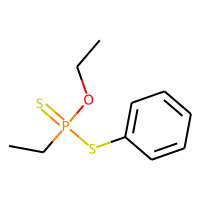
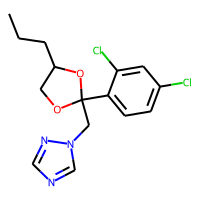
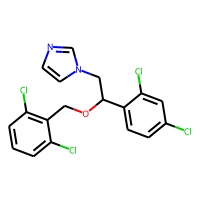
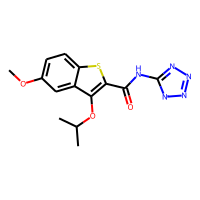
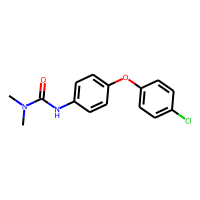
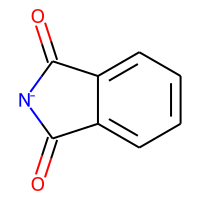
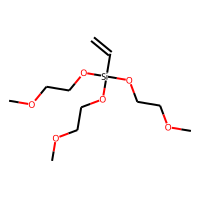
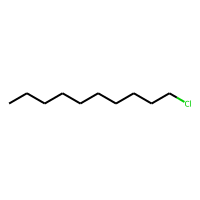
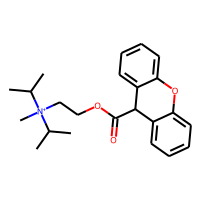
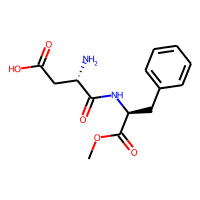

In [6]:
# after normalization
norm_datasets

In [7]:
# Fingerprint
rdkit_fp = []
for mol in norm_datasets.ROMol:
    mol = Chem.AddHs(mol) 
    fp = [x for x in Chem.RDKFingerprint(mol)]
    rdkit_fp.append(fp)
    
calc_datasets = norm_datasets.iloc[:,3:-1] # 3D information
rdkit_fp_df = pd.DataFrame(rdkit_fp) #2D information
calc_sets = pd.concat([calc_datasets,rdkit_fp_df], axis=1) #2D+3D information

In [8]:
calc_datasets

,energy,homo,lumo,HLgap,charge_ave,charge_var,dipole,mass,vol,dens
0,0.948334,0.404414,0.313344,0.297571,0.333333,0.057229,0.037083,0.272867,0.286945,0.130293
1,0.940981,0.295934,0.286802,0.393640,0.333333,0.025744,0.051104,0.392918,0.393488,0.150602
2,0.909633,0.325660,0.286535,0.357900,0.333333,0.019792,0.078314,0.485023,0.455846,0.176554
3,0.954123,0.491903,0.352646,0.242437,0.315315,0.047080,0.387991,0.381564,0.380805,0.151562
4,0.958889,0.349433,0.314728,0.364787,0.333333,0.037426,0.076846,0.328512,0.349253,0.128243
...,...,...,...,...,...,...,...,...,...,...
204,0.986185,0.545493,0.421624,0.264733,0.288889,0.065508,0.123642,0.146544,0.141481,0.148136
205,0.963295,0.288209,0.360604,0.494991,0.333333,0.109483,0.026316,0.315946,0.373088,0.094179
206,0.974303,0.249853,0.403670,0.594448,0.333333,0.012680,0.039779,0.184576,0.251970,0.052788
207,0.963337,0.293399,0.261044,0.364498,0.345029,0.024064,0.307492,0.427216,0.503678,0.095571


In [9]:
calc_sets

,energy,homo,lumo,HLgap,charge_ave,charge_var,dipole,mass,vol,dens,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.948334,0.404414,0.313344,0.297571,0.333333,0.057229,0.037083,0.272867,0.286945,0.130293,...,1,0,0,0,1,0,1,1,1,1
1,0.940981,0.295934,0.286802,0.393640,0.333333,0.025744,0.051104,0.392918,0.393488,0.150602,...,1,1,1,1,1,1,1,1,1,1
2,0.909633,0.325660,0.286535,0.357900,0.333333,0.019792,0.078314,0.485023,0.455846,0.176554,...,1,1,1,1,1,1,1,1,1,0
3,0.954123,0.491903,0.352646,0.242437,0.315315,0.047080,0.387991,0.381564,0.380805,0.151562,...,1,1,0,1,0,1,0,1,1,1
4,0.958889,0.349433,0.314728,0.364787,0.333333,0.037426,0.076846,0.328512,0.349253,0.128243,...,0,1,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0.986185,0.545493,0.421624,0.264733,0.288889,0.065508,0.123642,0.146544,0.141481,0.148136,...,0,1,0,0,0,0,0,0,1,1
205,0.963295,0.288209,0.360604,0.494991,0.333333,0.109483,0.026316,0.315946,0.373088,0.094179,...,1,0,0,0,0,0,0,1,0,0
206,0.974303,0.249853,0.403670,0.594448,0.333333,0.012680,0.039779,0.184576,0.251970,0.052788,...,0,0,0,0,0,0,0,0,1,0
207,0.963337,0.293399,0.261044,0.364498,0.345029,0.024064,0.307492,0.427216,0.503678,0.095571,...,0,1,1,0,0,1,0,1,1,1


In [10]:
# number of active and inactive samples
norm_datasets['activity'].value_counts()

0    106
1    103
Name: activity, dtype: int64

### 1：RandomForest 

The experiment was performed three times and the average value was taken

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

#Only Rdkit Finger Print
#Calculation Results + Rdkit Finger Print
forest1 = RandomForestClassifier(n_estimators=500,max_depth=7)
scores1 = cross_val_score(forest1, rdkit_fp_df, norm_datasets.activity, cv=10, scoring="roc_auc") #直接传入x和y
print('=======Only Rdkit Finger Print========')
print('scores1=',scores1)

#Calculation Results + Rdkit Finger Print
forest2 = RandomForestClassifier(n_estimators=500,max_depth=7)
scores2 = cross_val_score(forest2, calc_sets, norm_datasets.activity, cv=10, scoring="roc_auc") #直接传入x和y
print('=======Calculation Results + Rdkit Finger Print========')
print('scores2=',scores2)

#Only Calculation Results
forest3 = RandomForestClassifier(n_estimators=600,max_depth=7)
scores3 = cross_val_score(forest3, calc_datasets, norm_datasets.activity, cv=10, scoring="roc_auc") #直接传入x和y
print('=======Only Calculation Results========')
print('scores3=',scores3)

=======Only Rdkit Finger Print========
scores1= [0.92727273 0.75454545 0.9        0.7        0.78181818 0.91818182
 0.99090909 0.67272727 0.55454545 0.79      ]


/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature

=======Calculation Results + Rdkit Finger Print========
scores2= [0.90909091 0.77272727 0.91818182 0.71818182 0.86363636 0.93636364
 1.         0.71818182 0.53636364 0.77      ]
=======Only Calculation Results========
scores3= [0.76363636 0.85454545 0.86363636 0.81818182 0.76363636 0.95454545
 0.95454545 0.6        0.63636364 0.79      ]


### 2：RF+bagging

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score


#Only Rdkit Finger Print
#Calculation Results + Rdkit Finger Print
forest1 = RandomForestClassifier(n_estimators=500,max_depth=7)
bagging_forest1 = BaggingClassifier(forest1,n_estimators=60) 
scores1 = cross_val_score(bagging_forest1, rdkit_fp_df, norm_datasets.activity, cv=10, scoring="roc_auc") #直接传入x和y
print('=======Only Rdkit Finger Print========')
print('scores1=',scores1)

#Calculation Results + Rdkit Finger Print
forest2 = RandomForestClassifier(n_estimators=500,max_depth=7)
bagging_forest2 = BaggingClassifier(forest2,n_estimators=60) 
scores2 = cross_val_score(bagging_forest2, calc_sets, norm_datasets.activity, cv=10, scoring="roc_auc") #直接传入x和y
print('=======Calculation Results + Rdkit Finger Print========')
print('scores2=',scores2)

#Only Calculation Results
forest3 = RandomForestClassifier(n_estimators=500,max_depth=7)
bagging_forest3 = BaggingClassifier(forest3,n_estimators=60) 
scores3 = cross_val_score(bagging_forest3, calc_datasets, norm_datasets.activity, cv=10, scoring="roc_auc") #直接传入x和y
print('=======Only Calculation Results========')
print('scores3=',scores3)

=======Only Rdkit Finger Print========
scores1= [0.90909091 0.75454545 0.91818182 0.74545455 0.80909091 0.92727273
 0.97272727 0.71818182 0.54545455 0.79      ]


/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature

=======Calculation Results + Rdkit Finger Print========
scores2= [0.9        0.77272727 0.91818182 0.75454545 0.80909091 0.93636364
 0.99090909 0.70909091 0.55454545 0.79      ]
=======Only Calculation Results========
scores3= [0.75454545 0.85454545 0.88181818 0.87272727 0.73636364 0.98181818
 0.97272727 0.6        0.63636364 0.77      ]


### 3：RF+AdaBoost

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score


#Only Rdkit Finger Print
#Calculation Results + Rdkit Finger Print
forest1 = RandomForestClassifier(n_estimators=500,max_depth=7)
bagging_forest1 = AdaBoostClassifier(forest1,n_estimators=60) 
scores1 = cross_val_score(bagging_forest1, rdkit_fp_df, norm_datasets.activity, cv=10, scoring="roc_auc") #直接传入x和y
print('=======Only Rdkit Finger Print========')
print('scores1=',scores1)

#Calculation Results + Rdkit Finger Print
forest2 = RandomForestClassifier(n_estimators=500,max_depth=7)
bagging_forest2 = AdaBoostClassifier(forest2,n_estimators=60) 
scores2 = cross_val_score(bagging_forest2, calc_sets, norm_datasets.activity, cv=10, scoring="roc_auc") #直接传入x和y
print('=======Calculation Results + Rdkit Finger Print========')
print('scores2=',scores2)

#Only Calculation Results
forest3 = RandomForestClassifier(n_estimators=500,max_depth=7)
bagging_forest3 = AdaBoostClassifier(forest3,n_estimators=60) 
scores3 = cross_val_score(bagging_forest3, calc_datasets, norm_datasets.activity, cv=10, scoring="roc_auc") #直接传入x和y
print('=======Only Calculation Results========')
print('scores3=',scores3)

=======Only Rdkit Finger Print========
scores1= [0.91818182 0.78181818 0.89090909 0.72727273 0.78181818 0.92727273
 0.96363636 0.66363636 0.55454545 0.79      ]


/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature

=======Calculation Results + Rdkit Finger Print========
scores2= [0.88181818 0.74545455 0.91818182 0.7        0.79090909 0.94545455
 0.98181818 0.70909091 0.56363636 0.76      ]
=======Only Calculation Results========
scores3= [0.79090909 0.84545455 0.86363636 0.81818182 0.75454545 0.98181818
 0.96363636 0.6        0.63636364 0.77      ]


### 4：GradientBoost only

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

#Only Rdkit Finger Print
#Calculation Results + Rdkit Finger Print
forest1 = GradientBoostingClassifier(n_estimators=500,max_depth=7)
scores1 = cross_val_score(forest1, rdkit_fp_df, norm_datasets.activity, cv=10, scoring="roc_auc") #直接传入x和y
print('=======Only Rdkit Finger Print========')
print('scores1=',scores1)

#Calculation Results + Rdkit Finger Print
forest2 = GradientBoostingClassifier(n_estimators=500,max_depth=7)
scores2 = cross_val_score(forest2, calc_sets, norm_datasets.activity, cv=10, scoring="roc_auc") #直接传入x和y
print('=======Calculation Results + Rdkit Finger Print========')
print('scores2=',scores2)

#Only Calculation Results
forest3 = GradientBoostingClassifier(n_estimators=600,max_depth=7)
scores3 = cross_val_score(forest3, calc_datasets, norm_datasets.activity, cv=10, scoring="roc_auc") #直接传入x和y
print('=======Only Calculation Results========')
print('scores3=',scores3)

=======Only Rdkit Finger Print========
scores1= [0.79090909 0.74090909 0.64545455 0.69090909 0.58181818 0.61818182
 0.80909091 0.53636364 0.56818182 0.615     ]


/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature

=======Calculation Results + Rdkit Finger Print========
scores2= [0.81818182 0.79090909 0.69090909 0.69090909 0.66363636 0.82727273
 1.         0.68181818 0.56363636 0.82      ]
=======Only Calculation Results========
scores3= [0.72727273 0.87272727 0.75454545 0.78181818 0.71818182 0.92727273
 0.90909091 0.52727273 0.62727273 0.75      ]


### 【ours】 5： GradientBoosting + bagging

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score


#Only Rdkit Finger Print
#Calculation Results + Rdkit Finger Print
forest1 = GradientBoostingClassifier(n_estimators=500,max_depth=7)
bagging_forest1 = BaggingClassifier(forest1,n_estimators=60) 
scores1 = cross_val_score(bagging_forest1, rdkit_fp_df, norm_datasets.activity, cv=10, scoring="roc_auc") #直接传入x和y
print('=======Only Rdkit Finger Print========')
print('scores1=',scores1)

#Calculation Results + Rdkit Finger Print
forest2 = GradientBoostingClassifier(n_estimators=500,max_depth=7)
bagging_forest2 = BaggingClassifier(forest2,n_estimators=60) 
scores2 = cross_val_score(bagging_forest2, calc_sets, norm_datasets.activity, cv=10, scoring="roc_auc") #直接传入x和y
print('=======Calculation Results + Rdkit Finger Print========')
print('scores2=',scores2)

#Only Calculation Results
forest3 = GradientBoostingClassifier(n_estimators=500,max_depth=7)
bagging_forest3 = BaggingClassifier(forest3,n_estimators=60) 
scores3 = cross_val_score(bagging_forest3, calc_datasets, norm_datasets.activity, cv=10, scoring="roc_auc") #直接传入x和y
print('=======Only Calculation Results========')
print('scores3=',scores3)

=======Only Rdkit Finger Print========
scores1= [0.92727273 0.75454545 0.80909091 0.63636364 0.69090909 0.91818182
 0.95454545 0.72727273 0.51818182 0.74      ]


/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature

=======Calculation Results + Rdkit Finger Print========
scores2= [0.93636364 0.85454545 0.82727273 0.75454545 0.78181818 0.96363636
 1.         0.71818182 0.58181818 0.82      ]
=======Only Calculation Results========
scores3= [0.74545455 0.9        0.84545455 0.82727273 0.75454545 0.95454545
 0.95454545 0.61818182 0.6        0.79      ]


### 6： GradientBoost + AdaBoost

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score


#Only Rdkit Finger Print
#Calculation Results + Rdkit Finger Print
forest1 = GradientBoostingClassifier(n_estimators=500,max_depth=7)
Ada_forest1 = AdaBoostClassifier(forest1,n_estimators=60) 
scores1 = cross_val_score(Ada_forest1, rdkit_fp_df, norm_datasets.activity, cv=10, scoring="roc_auc") #直接传入x和y
print('=======Only Rdkit Finger Print========')
print('scores1=',scores1)

#Calculation Results + Rdkit Finger Print
forest2 = GradientBoostingClassifier(n_estimators=500,max_depth=7)
Ada_forest2 = AdaBoostClassifier(forest2,n_estimators=60) 
scores2 = cross_val_score(Ada_forest2, calc_sets, norm_datasets.activity, cv=10, scoring="roc_auc") #直接传入x和y
print('=======Calculation Results + Rdkit Finger Print========')
print('scores2=',scores2)

#Only Calculation Results
forest3 = GradientBoostingClassifier(n_estimators=500,max_depth=7)
Ada_forest3 = AdaBoostClassifier(forest3,n_estimators=60) 
scores3 = cross_val_score(Ada_forest3, calc_datasets, norm_datasets.activity, cv=10, scoring="roc_auc") #直接传入x和y
print('=======Only Calculation Results========')
print('scores3=',scores3)

=======Only Rdkit Finger Print========
scores1= [0.79090909 0.70454545 0.61818182 0.69090909 0.56363636 0.62727273
 0.79090909 0.53636364 0.54090909 0.58      ]


/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/hpcfiles/users/wll/miniconda3/envs/MolPredictionTutorial/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature

=======Calculation Results + Rdkit Finger Print========
scores2= [0.78181818 0.81818182 0.69090909 0.7        0.63636364 0.83636364
 1.         0.69090909 0.56363636 0.82      ]
=======Only Calculation Results========
scores3= [0.83636364 0.86363636 0.78181818 0.77272727 0.58181818 0.93636364
 0.83636364 0.52727273 0.63636364 0.77      ]
